<font color='#77C66E'><center><h1><strong>❇ ❇ Final Project ❇ ❇</strong></h1></center>
</font> 

<h3><strong>Name:</strong> Seid Nima Moein Taghavi</h3>

<h3><strong>StudentId:</strong> 9822762211</h3>

<font color='#77C66E'><h2><strong>Introduction</strong></h2></font>  
<center><img src="https://www.iconpacks.net/icons/2/free-reddit-logo-icon-2436-thumb.png" width="100" height="100" style="object-fit: cover;"/>
<img src="https://cdn3.iconfinder.com/data/icons/logos-and-brands-adobe/512/267_Python-512.png" width="100" height="100" style="object-fit: cover;"/>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Pandas_logo.svg/1200px-Pandas_logo.svg.png" width="200" height="100" style="object-fit: cover;"/>
<img src="https://img.icons8.com/color/480/tensorflow.png" width="100" height="100" style="object-fit: cover;"/>
<img src="https://devocean.sk.com/CKFinderJava/userfiles/images/numpy(1).png" width="100" height="100" style="object-fit: cover;"/>
<img src="https://media.slid.es/uploads/465821/images/5836629/pasted-from-clipboard.png" width="100" height="100" style="object-fit: cover;"/>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/Scikit_learn_logo_small.svg/1200px-Scikit_learn_logo_small.svg.png" width="210" height="100" style="object-fit: cover;"/>
</center>
<h4>In this project, we are given comments of reddit users and the topic that they are related to. To be more specific, these topics are Biology, Chemistry and physics. Firstly, we will implement an optimized version of the given paper's clustering algorithm.in the next section, we will preprocess the train and test datasets that have been given to us, then we will provide and explore some popular bag of words neural network models that deal with this problem. And finally, as expected, we will provide models that combine the bag of words and the word2vec models. To clarify, the bag of words model does not take the semantic relations of words into account, and by combining it with a word2vec model we can remedy this.</h4>

#<font color='#77C66E'>**Clustering Algorithm**</font>
---

<h4>We will implement an optimized version of the clustering algorithm. To shed light on this, we use sklearn, numpy and programming best practices to significantly speed up the processes in different stages of the algorithm.</h4>

In [21]:
from sklearn.metrics.pairwise import euclidean_distances
from math import floor
import numpy as np

def calculate_distance_matrix(N, data):
  mat = np.array([np.array([0 for x in range(N)]) for y in range(N)])
  distances = euclidean_distances(data,data)
  return distances

def calculate_R_k(i, D, k):
  return np.argsort(D[i])[1:k+1] + 1

def calculate_R_k_all(N, D, k):
  arr = [0 for y in range(N)]
  for i in range(0, N):
      arr[i] = calculate_R_k(i, D, k)
  return np.array(arr)

def append_with_duplicate_check(l, item):
  if not item in l:
    np.append(l, item)
  return l

def calculate_D_current(N, D_original, R_k_arr, k):
  mat = np.array([np.array([-1 for x in range(N)]) for y in range(N)])
  first_part = (1/((k+1)**2))

  # Cache the P array so that we won't have to repeatedly calculate it's values
  cache = [0 for x in range(N)]

  for i in range(N):
    arr = R_k_arr[i].copy() - 1
    np.add(arr, i)
    cache[i] = arr

  # Use the symmetric property of the matrix and the numpy outer function 
  # (C code) to significantly speed up the process
  def calculate_cell(i, j):
    mat[i][j] = first_part * D_original[(cache[i], cache[j])].sum()
    mat[j][i] = mat[i][j]

  # def calculate_cell1(i, j):
  #   mat[i][j] = mat[j][i]

  f_ufunc = np.frompyfunc(calculate_cell, 2, 0)
  # f_ufunc2 = np.frompyfunc(calculate_cell1, 2, 0)

  def calculate_col(col, _):
    f_ufunc.outer(list(range(col+1)), [col])
  # def calculate_col1(col, _):
  #   f_ufunc2.outer(list(range(col+1, N)), [col])
  f_ufunc1 = np.frompyfunc(calculate_col, 2, 0)
  # f_ufunc3 = np.frompyfunc(calculate_col1, 2, 0)
  
  f_ufunc1.outer(list(range(N)), [1])
  # f_ufunc3.outer(list(range(N)), [1])

  return mat

def find_key_clusters(D, c):
  m = len(D)
  I = []
  argmin_i = -1
  argmin_val = float('inf')
  for i in range(m):
    sum = D[i][list(range(m))].sum()
    avg = sum / m
    if avg < argmin_val:
      argmin_val = avg
      argmin_i = i + 1
  I_1 = argmin_i
  I.append(I_1)
  
  K_n = list(range(1,m+1))
  K_n.remove(I_1)
  S_n = [I_1]
  n = 1

  cache = np.array([-1 for y in range(m)])

  while n != c:
    # I_n_plus_1 
    for I_k in K_n:
      distance = D[I_k-1][I[-1]-1]
      if distance < cache[I_k-1] or cache[I_k-1] == -1:
        cache[I_k-1] = distance
    argmax_i = cache.argmax()
    I_n_plus_1 = argmax_i+1
    I.append(I_n_plus_1)
    K_n_plus_1 = K_n.copy()
    K_n_plus_1.remove(I_n_plus_1)
    cache[I_n_plus_1 - 1] = -1
    S_n_plus_1 = S_n.copy()
    if not I_n_plus_1 in S_n_plus_1:
      S_n_plus_1.append(I_n_plus_1)
    n = n + 1
    K_n = K_n_plus_1
    S_n = S_n_plus_1
  return I

def update_labels(N, S_current, D_current, L):
  for i in range(1, N+1):
      if i not in S_current:
        argmin_i = -1
        argmin_val = float('inf')
        length = len(S_current)
        for j in range(length):
          dist = D_current[L[i-1]-1, S_current[j]-1]
          if dist < argmin_val:
            argmin_val = dist
            argmin_i = j
        L[i-1] = argmin_i + 1
        # print("i: " + str(argmin_i + 1))
      else:
        L[i-1] = S_current.index(i) + 1
        # print("i: " + str(S_current.index(i)))

def calc_P_i(i, N, L, R_k_arr):
  P_i = []
  for j in range(N):
    if L[j] == i:
      P_i.append(j+1)
  first_part = P_i.copy()

  for j in first_part:
    for a in R_k_arr[j-1]:
      if not a in P_i:
        P_i.append(a)

  return np.array(P_i)

def calculate_P_i_all(C_current, N, L, R_k_arr):
  arr = [0 for y in range(C_current+1)]
  for i in range(1, C_current+1):
      arr[i-1] = calc_P_i(i, N, L, R_k_arr)
  return np.array(arr, dtype=object)

def calculate_new_D_current(N, P_i_arr, D_original):
  mat = np.array([np.array([0 for x in range(N)]) for y in range(N)])
  for i in range(0, N):
    for j in range(0, N):
      len1 = len(P_i_arr[i])
      len2 = len(P_i_arr[j])
      # if len1 > 0 and len2 > 0:
      sum = 0
      for a in P_i_arr[i]-1:
        sum = sum + D_original[a][P_i_arr[j]-1].sum()
      mat[i][j] = (1/ (len1 * len2)) * sum
  return mat

def cluster(data, C_target):
  N = len(data)
  k = 2
  D_original = calculate_distance_matrix(N, data)  
  R_k_arr = calculate_R_k_all(N, D_original, k)
  g = C_target
  L = list(range(1, N+1))
  C_previous = N
  C_current = floor(N/g) 
  D_current = calculate_D_current(N, D_original, R_k_arr, k)
  while C_current > C_target:
    S_current = find_key_clusters(D_current, C_current)
    update_labels(N, S_current, D_current, L)
    P_i_arr = calculate_P_i_all(C_current, N, L, R_k_arr)
    D_current = calculate_new_D_current(C_current, P_i_arr, D_original)
    C_previous = C_current
    C_current = floor(C_current / g)
  if C_current != C_target:
    S_final = find_key_clusters(D_current, C_target)
    update_labels(N, S_final, D_current, L)
  return L

In [7]:
from sklearn.datasets import load_digits

data, labels = load_digits(return_X_y=True)

In [23]:
from sklearn.metrics.cluster import rand_score

rand_score(labels, cluster(data, 10))

0.9257987514454306

In [ ]:
# from sklearn.cluster import KMeans
# kmeans = KMeans(n_clusters = 10, random_state = 0)
# clusters = kmeans.fit_predict(data)
# rand_score(labels, clusters)

#<font color='#77C66E'>**Preprocessing**</font>
---
At this stage, we use libraries such as pandas and nltk which is one of the most popular and professional NLP python libraries to clean our data.

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [25]:
train = pd.read_csv('/content/drive/MyDrive/finalProject/train.csv')
test = pd.read_csv('/content/drive/MyDrive/finalProject/test.csv')

In [27]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords


      Unzipping corpora/stopwords.zip.



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [28]:
# CLEANING DATA

from nltk.corpus import stopwords
import string


def clean_doc(doc):
	# split into tokens by white space
	tokens = doc.split()
	# remove punctuation from each token
	table = str.maketrans('', '', string.punctuation)
	tokens = [w.translate(table) for w in tokens]
	# remove remaining tokens that are not alphabetic
	tokens = [word for word in tokens if word.isalpha()]
	# filter out stop words
	stop_words = set(stopwords.words('english'))
	tokens = [w for w in tokens if not w in stop_words]
	# filter out short tokens
	tokens = [word for word in tokens if len(word) > 1]
	return ' '.join(tokens)

train['Comment'] = train['Comment'].apply(clean_doc)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


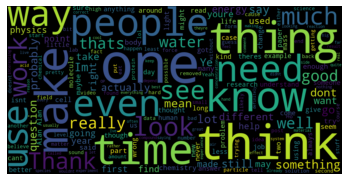

In [41]:
!pip install wordcloud
from wordcloud import WordCloud
text = " ".join(x for x in train['Comment'])

wordcloud = WordCloud(width=1200, height=600, max_font_size=200, background_color="black").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8695 entries, 0 to 8694
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Id       8695 non-null   object
 1   Comment  8695 non-null   object
 2   Topic    8695 non-null   object
dtypes: object(3)
memory usage: 203.9+ KB


In [ ]:
train['Topic'].value_counts()

Biology      3591
Chemistry    2920
Physics      2184
Name: Topic, dtype: int64

In [ ]:
# Transforming the labels to a numerical form

def transform_fun(x):
  if x == 'Biology':
    return 0
  elif x == 'Chemistry':
    return 1
  else:
    return 2

train['Topic'] = train['Topic'].apply(transform_fun)
y_train = pd.get_dummies(train['Topic'])
test['Topic'] = test['Topic'].apply(transform_fun)
y_test = pd.get_dummies(test['Topic'])

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586 entries, 0 to 1585
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Id       1586 non-null   object
 1   Comment  1586 non-null   object
 2   Topic    1586 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 37.3+ KB


In [42]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow import keras

In [ ]:
# Tokenization for NLP
tk = Tokenizer()

In [ ]:
tk.fit_on_texts(train['Comment'])

In [ ]:
tk.word_index

{'like': 1,
 'would': 2,
 'one': 3,
 'the': 4,
 'get': 5,
 'think': 6,
 'also': 7,
 'know': 8,
 'dont': 9,
 'it': 10,
 'if': 11,
 'time': 12,
 'could': 13,
 'much': 14,
 'people': 15,
 'you': 16,
 'im': 17,
 'make': 18,
 'even': 19,
 'good': 20,
 'really': 21,
 'see': 22,
 'way': 23,
 'this': 24,
 'need': 25,
 'water': 26,
 'use': 27,
 'its': 28,
 'thats': 29,
 'well': 30,
 'something': 31,
 'energy': 32,
 'work': 33,
 'sure': 34,
 'go': 35,
 'lot': 36,
 'different': 37,
 'but': 38,
 'want': 39,
 'things': 40,
 'first': 41,
 'so': 42,
 'probably': 43,
 'say': 44,
 'still': 45,
 'chemistry': 46,
 'yes': 47,
 'thanks': 48,
 'right': 49,
 'actually': 50,
 'youre': 51,
 'physics': 52,
 'question': 53,
 'what': 54,
 'many': 55,
 'and': 56,
 'going': 57,
 'light': 58,
 'used': 59,
 'they': 60,
 'look': 61,
 'pretty': 62,
 'made': 63,
 'enough': 64,
 'thing': 65,
 'thank': 66,
 'may': 67,
 'find': 68,
 'might': 69,
 'doesnt': 70,
 'mean': 71,
 'body': 72,
 'acid': 73,
 'two': 74,
 'never': 75

In [ ]:
# Different modes: binary, count, freq, tf-idf
vectors = tk.texts_to_matrix(train['Comment'], mode='count')

In [ ]:
vectors1 = tk.texts_to_matrix(test['Comment'], mode='count')

In [ ]:
X_train = pd.DataFrame(vectors)

In [ ]:
X_test = pd.DataFrame(vectors1)

#<font color='#77C66E'>**Bag of words models**</font>
---
We explore some models that use the bag of words method, and are not in combination in any way with any word2vec model. Later on, we will compare the results of these models with combined models.

##<font color='#77C66E'>**Model 1**</font>
---
This model is a bag of words model with mode='count'. This model will not be used in future comparisons.

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Input(shape=X_train.shape[1:]))
# model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

opt = keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 56583     
                                                                 
Total params: 56,583
Trainable params: 56,583
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x=X_train, y=y_train, epochs=10, batch_size=16,
          validation_data=(X_test,y_test))

Epoch 1/10
544/544 [==============================] - 4s 6ms/step - loss: 0.9865 - accuracy: 0.5683 - val_loss: 0.7068 - val_accuracy: 0.7188
Epoch 2/10
544/544 [==============================] - 3s 6ms/step - loss: 0.8084 - accuracy: 0.7110 - val_loss: 0.6201 - val_accuracy: 0.7427
Epoch 3/10
544/544 [==============================] - 4s 6ms/step - loss: 0.7079 - accuracy: 0.7693 - val_loss: 0.5778 - val_accuracy: 0.7604
Epoch 4/10
544/544 [==============================] - 3s 6ms/step - loss: 0.6366 - accuracy: 0.8051 - val_loss: 0.5711 - val_accuracy: 0.7667
Epoch 5/10
544/544 [==============================] - 3s 6ms/step - loss: 0.5811 - accuracy: 0.8314 - val_loss: 0.5612 - val_accuracy: 0.7762
Epoch 6/10
544/544 [==============================] - 3s 6ms/step - loss: 0.5361 - accuracy: 0.8515 - val_loss: 0.5674 - val_accuracy: 0.7768
Epoch 7/10
544/544 [==============================] - 3s 6ms/step - loss: 0.4984 - accuracy: 0.8641 - val_loss: 0.5695 - val_accuracy: 0.7818
Epoch 

##<font color='#77C66E'>**Model 2**</font>
---
This model is a tf-idf bag of words model, which we will use in all comparisons. Furthermore, multiple tf-idf models are presented, but the base one will be used throughout this research, because of the lack of a major difference in results.

###<font color='#77C66E'>**TFIDF - Base**</font>
---

In [ ]:
vectors = tk.texts_to_matrix(train['Comment'], mode='count')

In [ ]:
vectors1 = tk.texts_to_matrix(test['Comment'], mode='count')

In [ ]:
X_train = pd.DataFrame(vectors)

In [ ]:
X_test = pd.DataFrame(vectors1)

We use sklearn the Tfidf transformer to turn our mode='count' bag of words to a bag of words that uses tfidf.  
**NOTE:** This is different from the keras mode='tfidf' transformer. The keras library uses a unique method which I believe works better than methods in other libraries, but rather than looking for the best results, it is only important that we are **consistent** and use the **same method** throughout our research. Otherwise, our findings would lack legitimacy.

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

pipe = Pipeline([('tfid', TfidfTransformer())]).fit(X_train)
X_train_resultt = pipe.transform(X_train)
X_test_resultt = pipe.transform(X_test)

In [ ]:
X_train_resultt = pd.DataFrame.sparse.from_spmatrix(X_train_resultt)
X_test_resultt = pd.DataFrame.sparse.from_spmatrix(X_test_resultt)

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Input(shape=X_train.shape[1:]))
model.add(keras.layers.Dense(3, activation='softmax'))

opt = keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
model.fit(x=X_train_resultt, y=y_train, epochs=10, batch_size=16,
          validation_data=(X_test_resultt,y_test))

Epoch 1/10
544/544 [==============================] - 5s 8ms/step - loss: 1.0577 - accuracy: 0.4496 - val_loss: 1.0267 - val_accuracy: 0.4010
Epoch 2/10
544/544 [==============================] - 3s 5ms/step - loss: 0.9776 - accuracy: 0.5469 - val_loss: 0.9669 - val_accuracy: 0.4931
Epoch 3/10
544/544 [==============================] - 3s 5ms/step - loss: 0.9089 - accuracy: 0.6698 - val_loss: 0.9123 - val_accuracy: 0.6059
Epoch 4/10
544/544 [==============================] - 3s 5ms/step - loss: 0.8483 - accuracy: 0.7341 - val_loss: 0.8634 - val_accuracy: 0.6797
Epoch 5/10
544/544 [==============================] - 3s 5ms/step - loss: 0.7948 - accuracy: 0.7819 - val_loss: 0.8214 - val_accuracy: 0.7087
Epoch 6/10
544/544 [==============================] - 3s 5ms/step - loss: 0.7477 - accuracy: 0.8074 - val_loss: 0.7836 - val_accuracy: 0.7421
Epoch 7/10
544/544 [==============================] - 3s 5ms/step - loss: 0.7057 - accuracy: 0.8281 - val_loss: 0.7507 - val_accuracy: 0.7598
Epoch 

In [ ]:
model.fit(x=X_train, y=y_train, epochs=10, batch_size=16,
          validation_data=(X_test,y_test))

Epoch 1/10
544/544 [==============================] - 3s 5ms/step - loss: 0.3902 - accuracy: 0.8620 - val_loss: 0.9398 - val_accuracy: 0.7768
Epoch 2/10
544/544 [==============================] - 3s 5ms/step - loss: 0.3521 - accuracy: 0.8853 - val_loss: 0.8927 - val_accuracy: 0.7799
Epoch 3/10
544/544 [==============================] - 3s 5ms/step - loss: 0.3309 - accuracy: 0.8963 - val_loss: 0.8441 - val_accuracy: 0.7837
Epoch 4/10
544/544 [==============================] - 3s 5ms/step - loss: 0.3148 - accuracy: 0.9045 - val_loss: 0.8278 - val_accuracy: 0.7850
Epoch 5/10
544/544 [==============================] - 3s 5ms/step - loss: 0.3012 - accuracy: 0.9098 - val_loss: 0.8059 - val_accuracy: 0.7907
Epoch 6/10
544/544 [==============================] - 3s 5ms/step - loss: 0.2891 - accuracy: 0.9158 - val_loss: 0.8029 - val_accuracy: 0.7951
Epoch 7/10
544/544 [==============================] - 3s 5ms/step - loss: 0.2781 - accuracy: 0.9196 - val_loss: 0.7984 - val_accuracy: 0.7932
Epoch 

###<font color='#77C66E'>**TFIDF - Sublinear TF**</font>
---

In [ ]:
vectors = tk.texts_to_matrix(train['Comment'], mode='count')
vectors1 = tk.texts_to_matrix(test['Comment'], mode='count')
X_train = pd.DataFrame(vectors)
X_test = pd.DataFrame(vectors1)

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

pipe = Pipeline([('tfid', TfidfTransformer(sublinear_tf=True))]).fit(X_train)
X_train_resultt = pipe.transform(X_train)
X_test_resultt = pipe.transform(X_test)

X_train_resultt = pd.DataFrame.sparse.from_spmatrix(X_train_resultt)
X_test_resultt = pd.DataFrame.sparse.from_spmatrix(X_test_resultt)

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Input(shape=X_train.shape[1:]))
model.add(keras.layers.Dense(3, activation='softmax'))

opt = keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
model.fit(x=X_train, y=y_train, epochs=10, batch_size=16,
          validation_data=(X_test,y_test))

Epoch 1/10
544/544 [==============================] - 4s 7ms/step - loss: 0.9880 - accuracy: 0.5594 - val_loss: 0.7127 - val_accuracy: 0.7137
Epoch 2/10
544/544 [==============================] - 4s 7ms/step - loss: 0.8095 - accuracy: 0.7140 - val_loss: 0.6275 - val_accuracy: 0.7371
Epoch 3/10
544/544 [==============================] - 3s 5ms/step - loss: 0.7085 - accuracy: 0.7730 - val_loss: 0.5864 - val_accuracy: 0.7610
Epoch 4/10
544/544 [==============================] - 4s 8ms/step - loss: 0.6367 - accuracy: 0.8063 - val_loss: 0.5654 - val_accuracy: 0.7711
Epoch 5/10
544/544 [==============================] - 3s 5ms/step - loss: 0.5811 - accuracy: 0.8334 - val_loss: 0.5709 - val_accuracy: 0.7711
Epoch 6/10
544/544 [==============================] - 3s 5ms/step - loss: 0.5362 - accuracy: 0.8484 - val_loss: 0.5730 - val_accuracy: 0.7793
Epoch 7/10
544/544 [==============================] - 3s 5ms/step - loss: 0.4984 - accuracy: 0.8634 - val_loss: 0.5713 - val_accuracy: 0.7850
Epoch 

###<font color='#77C66E'>**TFIDF - Smooth Idf**</font>
---

In [ ]:
vectors = tk.texts_to_matrix(train['Comment'], mode='count')
vectors1 = tk.texts_to_matrix(test['Comment'], mode='count')
X_train = pd.DataFrame(vectors)
X_test = pd.DataFrame(vectors1)

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

pipe = Pipeline([('tfid', TfidfTransformer(smooth_idf=True))]).fit(X_train)
X_train_resultt = pipe.transform(X_train)
X_test_resultt = pipe.transform(X_test)

X_train_resultt = pd.DataFrame.sparse.from_spmatrix(X_train_resultt)
X_test_resultt = pd.DataFrame.sparse.from_spmatrix(X_test_resultt)

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Input(shape=X_train.shape[1:]))
model.add(keras.layers.Dense(3, activation='softmax'))

opt = keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
model.fit(x=X_train, y=y_train, epochs=10, batch_size=16,
          validation_data=(X_test,y_test))

Epoch 1/10
544/544 [==============================] - 4s 7ms/step - loss: 0.9864 - accuracy: 0.5649 - val_loss: 0.7297 - val_accuracy: 0.6923
Epoch 2/10
544/544 [==============================] - 3s 5ms/step - loss: 0.8085 - accuracy: 0.7063 - val_loss: 0.6207 - val_accuracy: 0.7446
Epoch 3/10
544/544 [==============================] - 3s 5ms/step - loss: 0.7081 - accuracy: 0.7642 - val_loss: 0.5766 - val_accuracy: 0.7686
Epoch 4/10
544/544 [==============================] - 2s 5ms/step - loss: 0.6365 - accuracy: 0.8054 - val_loss: 0.5650 - val_accuracy: 0.7724
Epoch 5/10
544/544 [==============================] - 2s 4ms/step - loss: 0.5812 - accuracy: 0.8301 - val_loss: 0.5674 - val_accuracy: 0.7768
Epoch 6/10
544/544 [==============================] - 3s 5ms/step - loss: 0.5361 - accuracy: 0.8514 - val_loss: 0.5612 - val_accuracy: 0.7831
Epoch 7/10
544/544 [==============================] - 3s 5ms/step - loss: 0.4984 - accuracy: 0.8647 - val_loss: 0.5735 - val_accuracy: 0.7825
Epoch 

###<font color='#77C66E'>**TFIDF - Sublinear TF & Smooth Idf**</font>
---

In [ ]:
vectors = tk.texts_to_matrix(train['Comment'], mode='count')
vectors1 = tk.texts_to_matrix(test['Comment'], mode='count')
X_train = pd.DataFrame(vectors)
X_test = pd.DataFrame(vectors1)

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

pipe = Pipeline([('tfid', TfidfTransformer(sublinear_tf=True, smooth_idf=True))]).fit(X_train)
X_train_resultt = pipe.transform(X_train)
X_test_resultt = pipe.transform(X_test)

X_train_resultt = pd.DataFrame.sparse.from_spmatrix(X_train_resultt)
X_test_resultt = pd.DataFrame.sparse.from_spmatrix(X_test_resultt)

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Input(shape=X_train.shape[1:]))
model.add(keras.layers.Dense(3, activation='softmax'))

opt = keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
model.fit(x=X_train, y=y_train, epochs=10, batch_size=16,
          validation_data=(X_test,y_test))

Epoch 1/10
544/544 [==============================] - 3s 5ms/step - loss: 0.9863 - accuracy: 0.5608 - val_loss: 0.7135 - val_accuracy: 0.7238
Epoch 2/10
544/544 [==============================] - 3s 5ms/step - loss: 0.8086 - accuracy: 0.7129 - val_loss: 0.6199 - val_accuracy: 0.7377
Epoch 3/10
544/544 [==============================] - 2s 5ms/step - loss: 0.7082 - accuracy: 0.7627 - val_loss: 0.5661 - val_accuracy: 0.7724
Epoch 4/10
544/544 [==============================] - 3s 5ms/step - loss: 0.6367 - accuracy: 0.8067 - val_loss: 0.5644 - val_accuracy: 0.7718
Epoch 5/10
544/544 [==============================] - 3s 5ms/step - loss: 0.5811 - accuracy: 0.8270 - val_loss: 0.5592 - val_accuracy: 0.7774
Epoch 6/10
544/544 [==============================] - 2s 5ms/step - loss: 0.5361 - accuracy: 0.8542 - val_loss: 0.5717 - val_accuracy: 0.7774
Epoch 7/10
544/544 [==============================] - 3s 5ms/step - loss: 0.4985 - accuracy: 0.8641 - val_loss: 0.5767 - val_accuracy: 0.7762
Epoch 

#<font color='#77C66E'>**Loading our Word2Vec Model**</font>
---
We use the gensim library, which is one of the best and most popular Word2Vec implementations for python. We use the pretrained glove-twitter-25 library which shares 13745 words with our training dataset's vocabulary. This is one of the lighter models, but even this model is over 100MB's, some models even have a size close to a GB.

In [ ]:
import gensim.downloader

In [ ]:
glove_vectors = gensim.downloader.load('glove-twitter-25')

In [ ]:
vocab = tk.word_index.keys()

In [ ]:
shared = list(set.intersection(set(vocab), set(glove_vectors.wv.vocab)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


In [ ]:
len(shared)

13745

In [ ]:
glove_vectors.most_similar('twitter')

[('facebook', 0.9480051398277283),
 ('tweet', 0.9403422474861145),
 ('fb', 0.9342358708381653),
 ('instagram', 0.9104823470115662),
 ('chat', 0.8964964747428894),
 ('hashtag', 0.8885936141014099),
 ('tweets', 0.8878157734870911),
 ('tl', 0.8778461813926697),
 ('link', 0.877821147441864),
 ('internet', 0.8753897547721863)]

#<font color='#77C66E'>**Model 1**</font>
---
Both models are based on the idea of turning our bag of words into a bag of clusters. Meaning, instead of words, we should deal with clusters, but this does not mean that we can't have clusters with only one word. What this does is, we are grouping semantically related words together in clusters. This model uses the clustering algorithm provided in the **paper**, we provided an optimized implementation of it in the first section of this notebook.

In [ ]:
vectors = tk.texts_to_matrix(train['Comment'], mode='count')

In [ ]:
vectors1 = tk.texts_to_matrix(test['Comment'], mode='count')

In [ ]:
X_train = pd.DataFrame(vectors)

In [ ]:
X_test = pd.DataFrame(vectors1)

In [ ]:
N_Clusters = 10000

In [ ]:
labels = cluster(glove_vectors[shared], N_Clusters)

In [ ]:
N = len(labels)
train_series_list = [None for x in range(N_Clusters)]
test_series_list = [None for x in range(N_Clusters)]
indices = list()
for i in range(N):
  label = labels[i] - 1
  real_index = tk.word_index[shared[i]]
  indices.append(real_index)
  if train_series_list[label] is None:
    train_series_list[label] = X_train[real_index]
    test_series_list[label] = X_test[real_index]
  else:
    train_series_list[label] = train_series_list[label] + X_train[real_index]
    test_series_list[label] = test_series_list[label] + X_test[real_index]
  
# for i in train_series_list:
#   i.apply(lambda x : 1 if x > 0 else 0)
# for i in test_series_list:
#   i.apply(lambda x : 1 if x > 0 else 0)

X_train_result = X_train.drop(indices, axis=1)
X_test_result = X_test.drop(indices, axis=1)

X_train_result = pd.concat(
    [
        X_train_result,
        pd.concat(train_series_list, axis=1)
    ], axis=1
)

X_test_result = pd.concat(
    [
        X_test_result,
        pd.concat(test_series_list, axis=1)
    ], axis=1
)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

pipe = Pipeline([('tfid', TfidfTransformer())]).fit(X_train_result)
X_train_resultt = pipe.transform(X_train_result)
X_test_resultt = pipe.transform(X_test_result)

In [ ]:
X_train_resultt = pd.DataFrame.sparse.from_spmatrix(X_train_resultt)

In [ ]:
X_test_resultt = pd.DataFrame.sparse.from_spmatrix(X_test_resultt)

In [ ]:
labels = None

In [ ]:
X_train_result.shape

(8695, 33975)

In [ ]:
from tensorflow.keras.layers import Dropout

model = keras.Sequential()
model.add(keras.layers.Input(shape=X_train_resultt.shape[1:]))
model.add(keras.layers.Dense(3, activation='softmax'))

opt = keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
model.fit(x=X_train_resultt, y=y_train, epochs=10, batch_size=16,
          validation_data=(X_test_resultt,y_test))

Epoch 1/10
544/544 [==============================] - 5s 8ms/step - loss: 1.0616 - accuracy: 0.4182 - val_loss: 1.0249 - val_accuracy: 0.4540
Epoch 2/10
544/544 [==============================] - 3s 5ms/step - loss: 0.9956 - accuracy: 0.5265 - val_loss: 0.9624 - val_accuracy: 0.5813
Epoch 3/10
544/544 [==============================] - 3s 5ms/step - loss: 0.9384 - accuracy: 0.6243 - val_loss: 0.9054 - val_accuracy: 0.6873
Epoch 4/10
544/544 [==============================] - 8s 15ms/step - loss: 0.8875 - accuracy: 0.6951 - val_loss: 0.8561 - val_accuracy: 0.7434
Epoch 5/10
544/544 [==============================] - 3s 6ms/step - loss: 0.8420 - accuracy: 0.7384 - val_loss: 0.8107 - val_accuracy: 0.7749
Epoch 6/10
544/544 [==============================] - 3s 5ms/step - loss: 0.8016 - accuracy: 0.7663 - val_loss: 0.7728 - val_accuracy: 0.7888
Epoch 7/10
544/544 [==============================] - 3s 5ms/step - loss: 0.7652 - accuracy: 0.7887 - val_loss: 0.7395 - val_accuracy: 0.7926
Epoch

In [ ]:
model.fit(x=X_train_resultt, y=y_train, epochs=10, batch_size=16,
          validation_data=(X_test_resultt,y_test))

Epoch 1/10
544/544 [==============================] - 4s 7ms/step - loss: 0.6511 - accuracy: 0.8263 - val_loss: 0.6396 - val_accuracy: 0.8172
Epoch 2/10
544/544 [==============================] - 3s 5ms/step - loss: 0.6284 - accuracy: 0.8305 - val_loss: 0.6206 - val_accuracy: 0.8165
Epoch 3/10
544/544 [==============================] - 3s 5ms/step - loss: 0.6075 - accuracy: 0.8407 - val_loss: 0.6041 - val_accuracy: 0.8178
Epoch 4/10
544/544 [==============================] - 3s 5ms/step - loss: 0.5881 - accuracy: 0.8438 - val_loss: 0.5895 - val_accuracy: 0.8209
Epoch 5/10
544/544 [==============================] - 3s 5ms/step - loss: 0.5701 - accuracy: 0.8475 - val_loss: 0.5752 - val_accuracy: 0.8216
Epoch 6/10
544/544 [==============================] - 3s 6ms/step - loss: 0.5533 - accuracy: 0.8539 - val_loss: 0.5633 - val_accuracy: 0.8247
Epoch 7/10
544/544 [==============================] - 3s 6ms/step - loss: 0.5377 - accuracy: 0.8559 - val_loss: 0.5521 - val_accuracy: 0.8253
Epoch 

In [ ]:
model.fit(x=X_train_resultt, y=y_train, epochs=10, batch_size=16,
          validation_data=(X_test_resultt,y_test))

Epoch 1/10
544/544 [==============================] - 4s 7ms/step - loss: 0.4840 - accuracy: 0.8687 - val_loss: 0.5165 - val_accuracy: 0.8304
Epoch 2/10
544/544 [==============================] - 3s 6ms/step - loss: 0.4724 - accuracy: 0.8706 - val_loss: 0.5093 - val_accuracy: 0.8335
Epoch 3/10
544/544 [==============================] - 3s 5ms/step - loss: 0.4615 - accuracy: 0.8744 - val_loss: 0.5031 - val_accuracy: 0.8323
Epoch 4/10
544/544 [==============================] - 3s 6ms/step - loss: 0.4511 - accuracy: 0.8763 - val_loss: 0.4973 - val_accuracy: 0.8323
Epoch 5/10
544/544 [==============================] - 3s 5ms/step - loss: 0.4412 - accuracy: 0.8795 - val_loss: 0.4916 - val_accuracy: 0.8335
Epoch 6/10
544/544 [==============================] - 4s 7ms/step - loss: 0.4318 - accuracy: 0.8804 - val_loss: 0.4867 - val_accuracy: 0.8323
Epoch 7/10
544/544 [==============================] - 3s 5ms/step - loss: 0.4229 - accuracy: 0.8825 - val_loss: 0.4821 - val_accuracy: 0.8304
Epoch 

In [ ]:
model.fit(x=X_train_resultt, y=y_train, epochs=10, batch_size=16,
          validation_data=(X_test_resultt,y_test))

Epoch 1/10
544/544 [==============================] - 7s 13ms/step - loss: 0.3912 - accuracy: 0.8897 - val_loss: 0.4678 - val_accuracy: 0.8304
Epoch 2/10
544/544 [==============================] - 3s 5ms/step - loss: 0.3841 - accuracy: 0.8907 - val_loss: 0.4646 - val_accuracy: 0.8298
Epoch 3/10
544/544 [==============================] - 3s 5ms/step - loss: 0.3773 - accuracy: 0.8925 - val_loss: 0.4621 - val_accuracy: 0.8272
Epoch 4/10
544/544 [==============================] - 3s 5ms/step - loss: 0.3707 - accuracy: 0.8944 - val_loss: 0.4597 - val_accuracy: 0.8272
Epoch 5/10
544/544 [==============================] - 3s 5ms/step - loss: 0.3644 - accuracy: 0.8947 - val_loss: 0.4576 - val_accuracy: 0.8272
Epoch 6/10
544/544 [==============================] - 3s 5ms/step - loss: 0.3585 - accuracy: 0.8956 - val_loss: 0.4557 - val_accuracy: 0.8272
Epoch 7/10
544/544 [==============================] - 4s 7ms/step - loss: 0.3526 - accuracy: 0.8981 - val_loss: 0.4542 - val_accuracy: 0.8266
Epoch

#<font color='#77C66E'>**Keeping previous data**</font>
---
We would explore what happens if we keep the previous data that are related to words, and add the data of clusters.  
The result is not satisfactory. But this method has been successful in some cases, I will explain this further in the conclusion.

In [ ]:
N_Clusters = 12000

In [ ]:
labels = cluster(glove_vectors[shared], N_Clusters)

In [ ]:
N = len(labels)
train_series_list = [None for x in range(N_Clusters)]
test_series_list = [None for x in range(N_Clusters)]
indices = list()
for i in range(N):
  label = labels[i] - 1
  real_index = tk.word_index[shared[i]]
  indices.append(real_index)
  if train_series_list[label] is None:
    train_series_list[label] = X_train[real_index]
    test_series_list[label] = X_test[real_index]
  else:
    train_series_list[label] = train_series_list[label] + X_train[real_index]
    test_series_list[label] = test_series_list[label] + X_test[real_index]
  
# for i in train_series_list:
#   i.apply(lambda x : 1 if x > 0 else 0)
# for i in test_series_list:
#   i.apply(lambda x : 1 if x > 0 else 0)

X_train_result = X_train.drop(indices, axis=1)
X_test_result = X_test.drop(indices, axis=1)

X_train_result = pd.concat(
    [
        X_train_result,
        pd.concat(train_series_list, axis=1)
    ], axis=1
)

X_test_result = pd.concat(
    [
        X_test_result,
        pd.concat(test_series_list, axis=1)
    ], axis=1
)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

pipe = Pipeline([('tfid', TfidfTransformer())]).fit(X_train_result)
X_train_resultt = pipe.transform(X_train_result)
X_test_resultt = pipe.transform(X_test_result)

In [ ]:
X_train_resultt = pd.DataFrame.sparse.from_spmatrix(X_train_resultt)
X_test_resultt = pd.DataFrame.sparse.from_spmatrix(X_test_resultt)

In [ ]:
labels = None

In [ ]:
X_train_result.shape

(8695, 17115)

In [ ]:
from tensorflow.keras.layers import Dropout

model = keras.Sequential()
model.add(keras.layers.Input(shape=X_train_resultt.shape[1:]))
model.add(keras.layers.Dense(3, activation='softmax'))

opt = keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
model.fit(x=X_train_resultt, y=y_train, epochs=10, batch_size=16,
          validation_data=(X_test_resultt,y_test))

Epoch 1/10
544/544 [==============================] - 5s 7ms/step - loss: 1.0592 - accuracy: 0.4345 - val_loss: 1.0318 - val_accuracy: 0.4048
Epoch 2/10
544/544 [==============================] - 4s 7ms/step - loss: 0.9841 - accuracy: 0.5422 - val_loss: 0.9753 - val_accuracy: 0.4855
Epoch 3/10
544/544 [==============================] - 4s 7ms/step - loss: 0.9195 - accuracy: 0.6427 - val_loss: 0.9236 - val_accuracy: 0.5927
Epoch 4/10
544/544 [==============================] - 3s 5ms/step - loss: 0.8623 - accuracy: 0.7202 - val_loss: 0.8787 - val_accuracy: 0.6551
Epoch 5/10
544/544 [==============================] - 3s 6ms/step - loss: 0.8118 - accuracy: 0.7617 - val_loss: 0.8380 - val_accuracy: 0.6923
Epoch 6/10
544/544 [==============================] - 3s 5ms/step - loss: 0.7669 - accuracy: 0.7925 - val_loss: 0.8030 - val_accuracy: 0.7150
Epoch 7/10
544/544 [==============================] - 3s 6ms/step - loss: 0.7269 - accuracy: 0.8123 - val_loss: 0.7718 - val_accuracy: 0.7320
Epoch 

#<font color='#77C66E'>**Lowering the # of clusters**</font>
---
We would explore what happens if we keep we lower the # of clusters.  
Again, the result is not satisfactory.  
Also, increasing the # of clusters is not necessarily helpful either.

In [ ]:
N_Clusters = 2000

In [ ]:
labels = cluster(glove_vectors[shared], N_Clusters)

In [ ]:
N = len(labels)
train_series_list = [None for x in range(N_Clusters)]
test_series_list = [None for x in range(N_Clusters)]
indices = list()
for i in range(N):
  label = labels[i] - 1
  real_index = tk.word_index[shared[i]]
  indices.append(real_index)
  if train_series_list[label] is None:
    train_series_list[label] = X_train[real_index]
    test_series_list[label] = X_test[real_index]
  else:
    train_series_list[label] = train_series_list[label] + X_train[real_index]
    test_series_list[label] = test_series_list[label] + X_test[real_index]
  
# for i in train_series_list:
#   i.apply(lambda x : 1 if x > 0 else 0)
# for i in test_series_list:
#   i.apply(lambda x : 1 if x > 0 else 0)

X_train_result = X_train.drop(indices, axis=1)
X_test_result = X_test.drop(indices, axis=1)

X_train_result = pd.concat(
    [
        X_train_result,
        pd.concat(train_series_list, axis=1)
    ], axis=1
)

X_test_result = pd.concat(
    [
        X_test_result,
        pd.concat(test_series_list, axis=1)
    ], axis=1
)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

pipe = Pipeline([('tfid', TfidfTransformer())]).fit(X_train_result)
X_train_resultt = pipe.transform(X_train_result)
X_test_resultt = pipe.transform(X_test_result)

In [ ]:
X_train_resultt = pd.DataFrame.sparse.from_spmatrix(X_train_resultt)
X_test_resultt = pd.DataFrame.sparse.from_spmatrix(X_test_resultt)

In [ ]:
labels = None

In [ ]:
X_train_result.shape

(8695, 7115)

In [ ]:
from tensorflow.keras.layers import Dropout

model = keras.Sequential()
model.add(keras.layers.Input(shape=X_train_resultt.shape[1:]))
model.add(keras.layers.Dense(3, activation='softmax'))

opt = keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
model.fit(x=X_train_resultt, y=y_train, epochs=10, batch_size=16,
          validation_data=(X_test_resultt,y_test))

Epoch 1/10
544/544 [==============================] - 3s 4ms/step - loss: 1.0746 - accuracy: 0.4136 - val_loss: 1.0807 - val_accuracy: 0.3884
Epoch 2/10
544/544 [==============================] - 2s 3ms/step - loss: 1.0443 - accuracy: 0.4362 - val_loss: 1.0632 - val_accuracy: 0.3979
Epoch 3/10
544/544 [==============================] - 2s 3ms/step - loss: 1.0183 - accuracy: 0.4758 - val_loss: 1.0478 - val_accuracy: 0.4187
Epoch 4/10
544/544 [==============================] - 2s 3ms/step - loss: 0.9949 - accuracy: 0.5323 - val_loss: 1.0329 - val_accuracy: 0.4224
Epoch 5/10
544/544 [==============================] - 2s 3ms/step - loss: 0.9731 - accuracy: 0.5603 - val_loss: 1.0182 - val_accuracy: 0.4691
Epoch 6/10
544/544 [==============================] - 2s 3ms/step - loss: 0.9533 - accuracy: 0.5991 - val_loss: 1.0058 - val_accuracy: 0.4811
Epoch 7/10
544/544 [==============================] - 2s 3ms/step - loss: 0.9348 - accuracy: 0.6168 - val_loss: 0.9951 - val_accuracy: 0.5063
Epoch 

In [ ]:
model.fit(x=X_train_resultt, y=y_train, epochs=10, batch_size=16,
          validation_data=(X_test_resultt,y_test))

Epoch 1/10
544/544 [==============================] - 3s 6ms/step - loss: 0.8727 - accuracy: 0.6597 - val_loss: 0.9528 - val_accuracy: 0.5567
Epoch 2/10
544/544 [==============================] - 3s 5ms/step - loss: 0.8595 - accuracy: 0.6690 - val_loss: 0.9437 - val_accuracy: 0.5719
Epoch 3/10
544/544 [==============================] - 2s 4ms/step - loss: 0.8470 - accuracy: 0.6737 - val_loss: 0.9358 - val_accuracy: 0.5889
Epoch 4/10
544/544 [==============================] - 2s 4ms/step - loss: 0.8352 - accuracy: 0.6777 - val_loss: 0.9282 - val_accuracy: 0.5895
Epoch 5/10
544/544 [==============================] - 2s 3ms/step - loss: 0.8238 - accuracy: 0.6835 - val_loss: 0.9222 - val_accuracy: 0.5851
Epoch 6/10
544/544 [==============================] - 2s 3ms/step - loss: 0.8132 - accuracy: 0.6841 - val_loss: 0.9125 - val_accuracy: 0.6110
Epoch 7/10
544/544 [==============================] - 2s 3ms/step - loss: 0.8032 - accuracy: 0.6924 - val_loss: 0.9062 - val_accuracy: 0.6129
Epoch 

In [ ]:
model.fit(x=X_train_resultt, y=y_train, epochs=10, batch_size=16,
          validation_data=(X_test_resultt,y_test))

Epoch 1/10
544/544 [==============================] - 2s 4ms/step - loss: 0.7670 - accuracy: 0.7019 - val_loss: 0.8833 - val_accuracy: 0.6236
Epoch 2/10
544/544 [==============================] - 2s 3ms/step - loss: 0.7588 - accuracy: 0.7034 - val_loss: 0.8796 - val_accuracy: 0.6166
Epoch 3/10
544/544 [==============================] - 2s 3ms/step - loss: 0.7511 - accuracy: 0.7053 - val_loss: 0.8722 - val_accuracy: 0.6299
Epoch 4/10
544/544 [==============================] - 2s 3ms/step - loss: 0.7438 - accuracy: 0.7088 - val_loss: 0.8690 - val_accuracy: 0.6299
Epoch 5/10
544/544 [==============================] - 1s 3ms/step - loss: 0.7367 - accuracy: 0.7102 - val_loss: 0.8649 - val_accuracy: 0.6267
Epoch 6/10
544/544 [==============================] - 2s 3ms/step - loss: 0.7299 - accuracy: 0.7113 - val_loss: 0.8604 - val_accuracy: 0.6318
Epoch 7/10
544/544 [==============================] - 2s 3ms/step - loss: 0.7233 - accuracy: 0.7116 - val_loss: 0.8562 - val_accuracy: 0.6318
Epoch 

In [ ]:
model.fit(x=X_train_resultt, y=y_train, epochs=20, batch_size=16,
          validation_data=(X_test_resultt,y_test))

Epoch 1/20
544/544 [==============================] - 4s 8ms/step - loss: 0.6994 - accuracy: 0.7162 - val_loss: 0.8427 - val_accuracy: 0.6393
Epoch 2/20
544/544 [==============================] - 3s 5ms/step - loss: 0.6940 - accuracy: 0.7166 - val_loss: 0.8378 - val_accuracy: 0.6393
Epoch 3/20
544/544 [==============================] - 2s 4ms/step - loss: 0.6888 - accuracy: 0.7187 - val_loss: 0.8356 - val_accuracy: 0.6406
Epoch 4/20
544/544 [==============================] - 2s 3ms/step - loss: 0.6837 - accuracy: 0.7187 - val_loss: 0.8323 - val_accuracy: 0.6425
Epoch 5/20
544/544 [==============================] - 2s 3ms/step - loss: 0.6788 - accuracy: 0.7204 - val_loss: 0.8292 - val_accuracy: 0.6456
Epoch 6/20
544/544 [==============================] - 2s 3ms/step - loss: 0.6741 - accuracy: 0.7212 - val_loss: 0.8271 - val_accuracy: 0.6425
Epoch 7/20
544/544 [==============================] - 2s 3ms/step - loss: 0.6695 - accuracy: 0.7225 - val_loss: 0.8238 - val_accuracy: 0.6501
Epoch 

In [ ]:
model.fit(x=X_train_resultt, y=y_train, epochs=50, batch_size=16,
          validation_data=(X_test_resultt,y_test))

Epoch 1/50
544/544 [==============================] - 3s 5ms/step - loss: 0.6193 - accuracy: 0.7278 - val_loss: 0.7990 - val_accuracy: 0.6532
Epoch 2/50
544/544 [==============================] - 2s 3ms/step - loss: 0.6164 - accuracy: 0.7272 - val_loss: 0.7973 - val_accuracy: 0.6545
Epoch 3/50
544/544 [==============================] - 2s 3ms/step - loss: 0.6136 - accuracy: 0.7280 - val_loss: 0.7968 - val_accuracy: 0.6520
Epoch 4/50
544/544 [==============================] - 2s 3ms/step - loss: 0.6110 - accuracy: 0.7306 - val_loss: 0.7938 - val_accuracy: 0.6608
Epoch 5/50
544/544 [==============================] - 2s 3ms/step - loss: 0.6083 - accuracy: 0.7289 - val_loss: 0.7922 - val_accuracy: 0.6602
Epoch 6/50
544/544 [==============================] - 2s 3ms/step - loss: 0.6058 - accuracy: 0.7286 - val_loss: 0.7932 - val_accuracy: 0.6513
Epoch 7/50
544/544 [==============================] - 2s 3ms/step - loss: 0.6035 - accuracy: 0.7309 - val_loss: 0.7911 - val_accuracy: 0.6564
Epoch 

#<font color='#77C66E'>**Model 2**</font>
---
This model uses a custom function instead. Which is **not really a clustering algorithm**, but it is rather a simple function that uses gensim's functions to group the words.  
Obvious **benefits**: Speed, Simple to understand  
To clarify the speed benefit, the function is very simple, it has no complex logic, again it is not a clustering algorithm. Secondly, it uses gensim's functions which are rather quick.  
To explain the simplicity of this function, we can change the threshold of similarity between words. (like combine words only if they are more than 90% similar)

The basic idea is that every word takes similar words into their group, and if those words are already in a group, it takes them only if it is more similar to them than the word that has took them into their current group. 

##<font color='#77C66E'>**Base**</font>
---
This code has to be used before all of the variations of Model 2 that are presented later on. The code restricts the Word2Vec model to the shared words. So that when the most similar method is called, we would only get the similar words that are in the training dataset's vocabulary. Also, there would probably be a performance boost, the minimum and the most immediate benefit being that we would not have to check whether the similar word is in the shared vocabulary or not. 

In [ ]:
def restrict_w2v(w2v, restricted_word_set):
    new_vectors = []
    new_vocab = {}
    new_index2entity = []
    new_vectors_norm = []

    for i in range(len(w2v.vocab)):
        word = w2v.index2entity[i]
        vec = w2v.vectors[i]
        vocab = w2v.vocab[word]
        vec_norm = w2v.vectors_norm[i]
        if word in restricted_word_set:
            vocab.index = len(new_index2entity)
            new_index2entity.append(word)
            new_vocab[word] = vocab
            new_vectors.append(vec)
            new_vectors_norm.append(vec_norm)

    w2v.vocab = new_vocab
    w2v.vectors = new_vectors
    w2v.index2entity = new_index2entity
    w2v.index2word = new_index2entity
    w2v.vectors_norm = new_vectors_norm

restrict_w2v(glove_vectors, shared)

##<font color='#77C66E'>**0.9 Threshold**</font>
---
We examine the model's performance using a threshold of 90% similarity.  
Also, remember the model's logic has been explained concisely in the introduction to this section.  

In [ ]:
# Combine similar words
# vocab = tk.word_index.keys()
# shared = set.intersection(set(vocab), set(glove_vectors.wv.vocab))
threshold = 0.9

keys = X_train.columns
combine_records = [-1 for key in keys]
last_combine_records = [0 for key in keys]
key_list = [[] for key in keys]

k = 1

for word in shared:
  i = tk.word_index[word]
  
  if combine_records[i] == -1:
    combine_records[i] = k
    key_list[k-1].append(i)
    k = k + 1
  
  for similar in glove_vectors.most_similar(word):
    percent = similar[1]

    if percent >= threshold:
      # COMBINE!
      similar_word = similar[0]
      j = tk.word_index[similar_word]
      if combine_records[j] != -1:
        if last_combine_records[j] > percent:
          break
        key_list[combine_records[j]-1].remove(j)
      # print('COMBINING ' + word + ' & ' + similar_word + ' ' + str(percent))
      combine_records[j] = combine_records[i]
      last_combine_records[j] = percent
      key_list[combine_records[i]-1].append(j)

k = 1
useful = [] # Used in Keeping previous data
for l in key_list:
  if len(l) == 0:
    continue
  if len(l) > 1:
    useful.append(k-1)
  for item in l:
    combine_records[item] = k
  k = k + 1
for i in range(len(keys)):
  if combine_records[i] == -1:
    combine_records[i] = k
    k = k + 1

labels = combine_records

In [ ]:
# for i in range(1, 14938+1):
#   if i not in set(labels):
#     print(i)

In [ ]:
N = len(X_train.columns)
N_Clusters=len(set(labels))
train_series_list = [None for x in range(N_Clusters)]
test_series_list = [None for x in range(N_Clusters)]
for i in range(N):
  # If the label (group) is already in the list
  # Add it to the group
  # If it is the first time this label (group) has appeared - add it
  label = labels[i] - 1
  real_index = i
  if train_series_list[label] is None:
    train_series_list[label] = X_train[real_index]
    test_series_list[label] = X_test[real_index]
  else:
    train_series_list[label] = train_series_list[label] + X_train[real_index]
    test_series_list[label] = test_series_list[label] + X_test[real_index]
  
# for i in train_series_list:
#   i.apply(lambda x : 1 if x > 0 else 0)
# for i in test_series_list:
#   i.apply(lambda x : 1 if x > 0 else 0)

# X_train_result = pd.concat([train_series_list[i] for i in useful], axis=1)
X_train_result = pd.concat(train_series_list, axis=1)

# X_test_result = pd.concat([test_series_list[i] for i in useful], axis=1)
X_test_result = pd.concat(test_series_list, axis=1)

In [ ]:
labels = None

A previous method for combining words. The current method shares code (combination phase) with
Model 1 and is preferred.

In [ ]:
# # Combine similar words
# # vocab = tk.word_index.keys()
# # shared = set.intersection(set(vocab), set(glove_vectors.wv.vocab))
# threshold = 0.96

# from ipywidgets import IntProgress
# from IPython.display import display
# import time

# max_count = 100

# f = IntProgress(min=0, max=len(shared)) # instantiate the bar
# display(f) # display the bar

# X_train_result = pd.DataFrame(X_train[0])
# X_test_result = pd.DataFrame(X_test[0])
# length = 0
# keys = X_train.columns
# combine_records = {key: -1 for key in keys}

# xx = 0

# for word in shared:
#   f.value += 1
#   i = tk.word_index[word]
#   if combine_records[i] != -1:
#     continue
#   # for similar in glove_vectors.most_similar(word):
#   similar = glove_vectors.most_similar(word)[0]
#   similar_word = similar[0]
#   percent = similar[1]

#   if percent >= threshold:
#     # COMBINE!
#     xx = xx + 1
#     # print('COMBINING ' + word + ' & ' + similar_word)
#     j = tk.word_index[similar_word]
#     if combine_records[j] != -1:
#       target = combine_records[j]
#       X_train_result[target] = X_train_result[target] + X_train[i]
#       X_test_result[target] = X_test_result[target] + X_test[i] 
#       combine_records[i] = target
#       continue
#     X_train_result[length] = X_train[i] + X_train[j]
#     X_test_result[length] = X_test[i] + X_test[j]
#     combine_records[i] = length
#     combine_records[j] = length
#     length = length + 1

# unchanged_list = [key for key in combine_records if (combine_records[key] == -1)]
# X_train_result = pd.concat(
#     [
#         X_train_result,
#         X_train[unchanged_list]
#     ], axis=1
# )

# X_test_result = pd.concat(
#     [
#         X_test_result,
#         X_test[unchanged_list]
#     ], axis=1
# )

In [ ]:
X_train_result = pd.concat(
    [
        X_train_result,
        X_train
    ], axis=1
)

X_test_result = pd.concat(
    [
        X_test_result,
        X_test
    ], axis=1
)

In [ ]:
X_train_result.shape

(8695, 34495)

In [ ]:
from tensorflow.keras.layers import Dropout

model = keras.Sequential()
model.add(keras.layers.Input(shape=X_train_result.shape[1:]))
model.add(keras.layers.Dense(3, activation='softmax'))

opt = keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
model.fit(x=X_train_result, y=y_train, epochs=10, batch_size=16,
          validation_data=(X_test_result,y_test))

Epoch 1/10
544/544 [==============================] - 8s 13ms/step - loss: 0.9339 - accuracy: 0.6143 - val_loss: 0.6246 - val_accuracy: 0.7459
Epoch 2/10
544/544 [==============================] - 5s 9ms/step - loss: 0.7102 - accuracy: 0.7581 - val_loss: 0.5497 - val_accuracy: 0.7837
Epoch 3/10
544/544 [==============================] - 5s 9ms/step - loss: 0.5991 - accuracy: 0.8145 - val_loss: 0.5357 - val_accuracy: 0.7907
Epoch 4/10
544/544 [==============================] - 5s 9ms/step - loss: 0.5245 - accuracy: 0.8460 - val_loss: 0.5789 - val_accuracy: 0.7774
Epoch 5/10
544/544 [==============================] - 5s 9ms/step - loss: 0.4690 - accuracy: 0.8667 - val_loss: 0.5430 - val_accuracy: 0.7951
Epoch 6/10
544/544 [==============================] - 5s 9ms/step - loss: 0.4256 - accuracy: 0.8795 - val_loss: 0.5934 - val_accuracy: 0.7831
Epoch 7/10
544/544 [==============================] - 5s 9ms/step - loss: 0.3897 - accuracy: 0.8934 - val_loss: 0.5997 - val_accuracy: 0.7875
Epoch

##<font color='#77C66E'>**TF-IDF**</font>
---
We examine the model's performance using a threshold of 90% similarity and using the TF-IDF method. 

In [ ]:
# Combine similar words
# vocab = tk.word_index.keys()
# shared = set.intersection(set(vocab), set(glove_vectors.wv.vocab))
threshold = 0.9

keys = X_train.columns
combine_records = [-1 for key in keys]
last_combine_records = [0 for key in keys]
key_list = [[] for key in keys]

k = 1

for word in shared:
  i = tk.word_index[word]
  
  if combine_records[i] == -1:
    combine_records[i] = k
    key_list[k-1].append(i)
    k = k + 1
  
  for similar in glove_vectors.most_similar(word):
    percent = similar[1]

    if percent >= threshold:
      # COMBINE!
      similar_word = similar[0]
      j = tk.word_index[similar_word]
      if combine_records[j] != -1:
        if last_combine_records[j] > percent:
          break
        key_list[combine_records[j]-1].remove(j)
      # print('COMBINING ' + word + ' & ' + similar_word + ' ' + str(percent))
      combine_records[j] = combine_records[i]
      last_combine_records[j] = percent
      key_list[combine_records[i]-1].append(j)

k = 1
useful = []
for l in key_list:
  if len(l) == 0:
    continue
  if len(l) > 1:
    useful.append(k-1)
  for item in l:
    combine_records[item] = k
  k = k + 1
for i in range(len(keys)):
  if combine_records[i] == -1:
    combine_records[i] = k
    k = k + 1

labels = combine_records

In [ ]:
# for i in range(1, 14938+1):
#   if i not in set(labels):
#     print(i)

In [ ]:
N = len(X_train.columns)
N_Clusters=len(set(labels))
train_series_list = [None for x in range(N_Clusters)]
test_series_list = [None for x in range(N_Clusters)]
for i in range(N):
  # If the label (group) is already in the list
  # Add it to the group
  # If it is the first time this label (group) has appeared - add it
  label = labels[i] - 1
  real_index = i
  if train_series_list[label] is None:
    train_series_list[label] = X_train[real_index]
    test_series_list[label] = X_test[real_index]
  else:
    train_series_list[label] = train_series_list[label] + X_train[real_index]
    test_series_list[label] = test_series_list[label] + X_test[real_index]
  
# for i in train_series_list:
#   i.apply(lambda x : 1 if x > 0 else 0)
# for i in test_series_list:
#   i.apply(lambda x : 1 if x > 0 else 0)

# X_train_result = pd.concat([train_series_list[i] for i in useful], axis=1)
X_train_result = pd.concat(train_series_list, axis=1)

# X_test_result = pd.concat([test_series_list[i] for i in useful], axis=1)
X_test_result = pd.concat(test_series_list, axis=1)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

pipe = Pipeline([('tfid', TfidfTransformer())]).fit(X_train_result)
X_train_resultt = pipe.transform(X_train_result)
X_test_resultt = pipe.transform(X_test_result)

In [ ]:
X_train_resultt = pd.DataFrame.sparse.from_spmatrix(X_train_resultt)
X_test_resultt = pd.DataFrame.sparse.from_spmatrix(X_test_resultt)

In [ ]:
from tensorflow.keras.layers import Dropout

model = keras.Sequential()
model.add(keras.layers.Input(shape=X_train_resultt.shape[1:]))
model.add(keras.layers.Dense(3, activation='softmax'))

opt = keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
model.fit(x=X_train_resultt, y=y_train, epochs=10, batch_size=16,
          validation_data=(X_test_resultt,y_test))

Epoch 1/10
544/544 [==============================] - 5s 8ms/step - loss: 1.0577 - accuracy: 0.4443 - val_loss: 1.0284 - val_accuracy: 0.4035
Epoch 2/10
544/544 [==============================] - 2s 5ms/step - loss: 0.9817 - accuracy: 0.5516 - val_loss: 0.9715 - val_accuracy: 0.4817
Epoch 3/10
544/544 [==============================] - 2s 4ms/step - loss: 0.9178 - accuracy: 0.6543 - val_loss: 0.9171 - val_accuracy: 0.6122
Epoch 4/10
544/544 [==============================] - 2s 4ms/step - loss: 0.8618 - accuracy: 0.7112 - val_loss: 0.8705 - val_accuracy: 0.6955
Epoch 5/10
544/544 [==============================] - 2s 4ms/step - loss: 0.8126 - accuracy: 0.7556 - val_loss: 0.8291 - val_accuracy: 0.7459
Epoch 6/10
544/544 [==============================] - 2s 4ms/step - loss: 0.7692 - accuracy: 0.7862 - val_loss: 0.7943 - val_accuracy: 0.7585
Epoch 7/10
544/544 [==============================] - 2s 4ms/step - loss: 0.7308 - accuracy: 0.8017 - val_loss: 0.7630 - val_accuracy: 0.7692
Epoch 

In [ ]:
model.fit(x=X_train_resultt, y=y_train, epochs=10, batch_size=16,
          validation_data=(X_test_resultt,y_test))

Epoch 1/10
544/544 [==============================] - 4s 7ms/step - loss: 0.6124 - accuracy: 0.8370 - val_loss: 0.6688 - val_accuracy: 0.7976
Epoch 2/10
544/544 [==============================] - 2s 5ms/step - loss: 0.5893 - accuracy: 0.8469 - val_loss: 0.6512 - val_accuracy: 0.7995
Epoch 3/10
544/544 [==============================] - 3s 5ms/step - loss: 0.5680 - accuracy: 0.8514 - val_loss: 0.6357 - val_accuracy: 0.8045
Epoch 4/10
544/544 [==============================] - 2s 5ms/step - loss: 0.5483 - accuracy: 0.8572 - val_loss: 0.6205 - val_accuracy: 0.8083
Epoch 5/10
544/544 [==============================] - 3s 5ms/step - loss: 0.5301 - accuracy: 0.8615 - val_loss: 0.6089 - val_accuracy: 0.8058
Epoch 6/10
544/544 [==============================] - 2s 5ms/step - loss: 0.5132 - accuracy: 0.8680 - val_loss: 0.5963 - val_accuracy: 0.8083
Epoch 7/10
544/544 [==============================] - 2s 4ms/step - loss: 0.4974 - accuracy: 0.8704 - val_loss: 0.5838 - val_accuracy: 0.8127
Epoch 

In [ ]:
model.fit(x=X_train_resultt, y=y_train, epochs=10, batch_size=16,
          validation_data=(X_test_resultt,y_test))

Epoch 1/10
544/544 [==============================] - 4s 8ms/step - loss: 0.4435 - accuracy: 0.8837 - val_loss: 0.5481 - val_accuracy: 0.8146
Epoch 2/10
544/544 [==============================] - 3s 5ms/step - loss: 0.4319 - accuracy: 0.8850 - val_loss: 0.5400 - val_accuracy: 0.8184
Epoch 3/10
544/544 [==============================] - 3s 5ms/step - loss: 0.4210 - accuracy: 0.8871 - val_loss: 0.5327 - val_accuracy: 0.8178
Epoch 4/10
544/544 [==============================] - 2s 5ms/step - loss: 0.4106 - accuracy: 0.8889 - val_loss: 0.5265 - val_accuracy: 0.8178
Epoch 5/10
544/544 [==============================] - 3s 5ms/step - loss: 0.4008 - accuracy: 0.8907 - val_loss: 0.5205 - val_accuracy: 0.8184
Epoch 6/10
544/544 [==============================] - 3s 5ms/step - loss: 0.3915 - accuracy: 0.8936 - val_loss: 0.5146 - val_accuracy: 0.8165
Epoch 7/10
544/544 [==============================] - 3s 5ms/step - loss: 0.3826 - accuracy: 0.8956 - val_loss: 0.5091 - val_accuracy: 0.8165
Epoch 

In [ ]:
model.fit(x=X_train_resultt, y=y_train, epochs=10, batch_size=16,
          validation_data=(X_test_resultt,y_test))

Epoch 1/10
544/544 [==============================] - 4s 7ms/step - loss: 0.3510 - accuracy: 0.9026 - val_loss: 0.4895 - val_accuracy: 0.8203
Epoch 2/10
544/544 [==============================] - 2s 4ms/step - loss: 0.3440 - accuracy: 0.9037 - val_loss: 0.4856 - val_accuracy: 0.8203
Epoch 3/10
544/544 [==============================] - 3s 5ms/step - loss: 0.3372 - accuracy: 0.9057 - val_loss: 0.4807 - val_accuracy: 0.8203
Epoch 4/10
544/544 [==============================] - 2s 4ms/step - loss: 0.3308 - accuracy: 0.9059 - val_loss: 0.4778 - val_accuracy: 0.8209
Epoch 5/10
544/544 [==============================] - 2s 5ms/step - loss: 0.3246 - accuracy: 0.9078 - val_loss: 0.4747 - val_accuracy: 0.8197
Epoch 6/10
544/544 [==============================] - 2s 5ms/step - loss: 0.3187 - accuracy: 0.9093 - val_loss: 0.4712 - val_accuracy: 0.8209
Epoch 7/10
544/544 [==============================] - 2s 5ms/step - loss: 0.3130 - accuracy: 0.9101 - val_loss: 0.4687 - val_accuracy: 0.8190
Epoch 

##<font color='#77C66E'>**Keeping previous data (and adding less columns)**</font>
---
We examine the model's performance using a threshold of 90% similarity and keeping previous data aswell. Furthermore, pay attention to the fact that this time we only add clusters with more than one word as columns. In contrast, we added all clusters as columns when examining Model1 data. This way we can examine how adding less columns that I believe are the more important ones, because info about clusters with a single word are already present in the data.  
Again, the result is not satisfactory in this case either.  
We used more processing power (we have more columns) to get worse results.  
Also note that the "keeping previous data" section in the Model 1 section is not intended to be related in any way to the "keeping previous data" section in the Model 2 section.

In [ ]:
# Combine similar words
# vocab = tk.word_index.keys()
# shared = set.intersection(set(vocab), set(glove_vectors.wv.vocab))
threshold = 0.9

keys = X_train.columns
combine_records = [-1 for key in keys]
last_combine_records = [0 for key in keys]
key_list = [[] for key in keys]

k = 1

for word in shared:
  i = tk.word_index[word]
  
  if combine_records[i] == -1:
    combine_records[i] = k
    key_list[k-1].append(i)
    k = k + 1
  
  for similar in glove_vectors.most_similar(word):
    percent = similar[1]

    if percent >= threshold:
      # COMBINE!
      similar_word = similar[0]
      j = tk.word_index[similar_word]
      if combine_records[j] != -1:
        if last_combine_records[j] > percent:
          break
        key_list[combine_records[j]-1].remove(j)
      # print('COMBINING ' + word + ' & ' + similar_word + ' ' + str(percent))
      combine_records[j] = combine_records[i]
      last_combine_records[j] = percent
      key_list[combine_records[i]-1].append(j)

k = 1
useful = []
for l in key_list:
  if len(l) == 0:
    continue
  if len(l) > 1:
    useful.append(k-1)
  for item in l:
    combine_records[item] = k
  k = k + 1
for i in range(len(keys)):
  if combine_records[i] == -1:
    combine_records[i] = k
    k = k + 1

labels = combine_records

In [ ]:
# for i in range(1, 14938+1):
#   if i not in set(labels):
#     print(i)

In [ ]:
N = len(X_train.columns)
N_Clusters=len(set(labels))
train_series_list = [None for x in range(N_Clusters)]
test_series_list = [None for x in range(N_Clusters)]
for i in range(N):
  # If the label (group) is already in the list
  # Add it to the group
  # If it is the first time this label (group) has appeared - add it
  label = labels[i] - 1
  real_index = i
  if train_series_list[label] is None:
    train_series_list[label] = X_train[real_index]
    test_series_list[label] = X_test[real_index]
  else:
    train_series_list[label] = train_series_list[label] + X_train[real_index]
    test_series_list[label] = test_series_list[label] + X_test[real_index]
  
# for i in train_series_list:
#   i.apply(lambda x : 1 if x > 0 else 0)
# for i in test_series_list:
#   i.apply(lambda x : 1 if x > 0 else 0)

X_train_result = pd.concat([train_series_list[i] for i in useful], axis=1)

X_test_result = pd.concat([test_series_list[i] for i in useful], axis=1)

In [ ]:
X_train_result.shape

(8695, 20191)

In [ ]:
X_test_result.shape

(1586, 20191)

In [ ]:
X_train_result = pd.concat(
    [
        X_train_result,
        X_train
    ], axis=1
)

X_test_result = pd.concat(
    [
        X_test_result,
        X_test
    ], axis=1
)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

pipe = Pipeline([('tfid', TfidfTransformer())]).fit(X_train_result)
X_train_resultt = pipe.transform(X_train_result)
X_test_resultt = pipe.transform(X_test_result)

In [ ]:
X_train_resultt = pd.DataFrame.sparse.from_spmatrix(X_train_resultt)
X_test_resultt = pd.DataFrame.sparse.from_spmatrix(X_test_resultt)

In [ ]:
X_train_resultt.shape

(8695, 20191)

In [ ]:
X_test_resultt.shape

(1586, 20191)

In [ ]:
X_train_resultt.shape[1:]

(20191,)

In [ ]:
from tensorflow.keras.layers import Dropout

model = keras.Sequential()
model.add(keras.layers.Input(shape=X_train_resultt.shape[1:]))
model.add(keras.layers.Dense(3, activation='softmax'))

opt = keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
model.fit(x=X_train_resultt, y=y_train, epochs=10, batch_size=16,
          validation_data=(X_test_resultt,y_test))

Epoch 1/10
544/544 [==============================] - 5s 8ms/step - loss: 1.0525 - accuracy: 0.4591 - val_loss: 1.0225 - val_accuracy: 0.3991
Epoch 2/10
544/544 [==============================] - 3s 6ms/step - loss: 0.9660 - accuracy: 0.5741 - val_loss: 0.9586 - val_accuracy: 0.5019
Epoch 3/10
544/544 [==============================] - 3s 6ms/step - loss: 0.8939 - accuracy: 0.6861 - val_loss: 0.9031 - val_accuracy: 0.6078
Epoch 4/10
544/544 [==============================] - 3s 5ms/step - loss: 0.8320 - accuracy: 0.7402 - val_loss: 0.8547 - val_accuracy: 0.6765
Epoch 5/10
544/544 [==============================] - 3s 5ms/step - loss: 0.7786 - accuracy: 0.7791 - val_loss: 0.8142 - val_accuracy: 0.7112
Epoch 6/10
544/544 [==============================] - 3s 5ms/step - loss: 0.7322 - accuracy: 0.8013 - val_loss: 0.7800 - val_accuracy: 0.7308
Epoch 7/10
544/544 [==============================] - 3s 5ms/step - loss: 0.6916 - accuracy: 0.8138 - val_loss: 0.7490 - val_accuracy: 0.7446
Epoch 

In [ ]:
model.fit(x=X_train_resultt, y=y_train, epochs=20, batch_size=16,
          validation_data=(X_test_resultt,y_test))

Epoch 1/20
544/544 [==============================] - 4s 7ms/step - loss: 0.5682 - accuracy: 0.8614 - val_loss: 0.6604 - val_accuracy: 0.7755
Epoch 2/20
544/544 [==============================] - 3s 5ms/step - loss: 0.5441 - accuracy: 0.8683 - val_loss: 0.6443 - val_accuracy: 0.7787
Epoch 3/20
544/544 [==============================] - 3s 5ms/step - loss: 0.5221 - accuracy: 0.8733 - val_loss: 0.6297 - val_accuracy: 0.7812
Epoch 4/20
544/544 [==============================] - 3s 5ms/step - loss: 0.5018 - accuracy: 0.8772 - val_loss: 0.6156 - val_accuracy: 0.7831
Epoch 5/20
544/544 [==============================] - 3s 5ms/step - loss: 0.4830 - accuracy: 0.8837 - val_loss: 0.6048 - val_accuracy: 0.7856
Epoch 6/20
544/544 [==============================] - 3s 5ms/step - loss: 0.4655 - accuracy: 0.8878 - val_loss: 0.5939 - val_accuracy: 0.7869
Epoch 7/20
544/544 [==============================] - 3s 5ms/step - loss: 0.4492 - accuracy: 0.8940 - val_loss: 0.5812 - val_accuracy: 0.7932
Epoch 

##<font color='#77C66E'>**Low Threshold**</font>
---
This time we use a lower threshold (70% similarity).  
The results are not that different.

In [ ]:
# Combine similar words
# vocab = tk.word_index.keys()
# shared = set.intersection(set(vocab), set(glove_vectors.wv.vocab))
threshold = 0.7

keys = X_train.columns
combine_records = [-1 for key in keys]
last_combine_records = [0 for key in keys]
key_list = [[] for key in keys]

k = 1

for word in shared:
  i = tk.word_index[word]
  
  if combine_records[i] == -1:
    combine_records[i] = k
    key_list[k-1].append(i)
    k = k + 1
  
  for similar in glove_vectors.most_similar(word):
    percent = similar[1]

    if percent >= threshold:
      # COMBINE!
      similar_word = similar[0]
      j = tk.word_index[similar_word]
      if combine_records[j] != -1:
        if last_combine_records[j] > percent:
          break
        key_list[combine_records[j]-1].remove(j)
      # print('COMBINING ' + word + ' & ' + similar_word + ' ' + str(percent))
      combine_records[j] = combine_records[i]
      last_combine_records[j] = percent
      key_list[combine_records[i]-1].append(j)

k = 1
for l in key_list:
  if len(l) == 0:
    continue
  for item in l:
    combine_records[item] = k
  k = k + 1
for i in range(len(keys)):
  if combine_records[i] == -1:
    combine_records[i] = k
    k = k + 1

labels = combine_records

In [ ]:
N = len(X_train.columns)
N_Clusters=len(set(labels))
train_series_list = [None for x in range(N_Clusters)]
test_series_list = [None for x in range(N_Clusters)]
for i in range(N):
  # If the label (group) is already in the list
  # Add it to the group
  # If it is the first time this label (group) has appeared - add it
  label = labels[i] - 1
  real_index = i
  if train_series_list[label] is None:
    train_series_list[label] = X_train[real_index]
    test_series_list[label] = X_test[real_index]
  else:
    train_series_list[label] = train_series_list[label] + X_train[real_index]
    test_series_list[label] = test_series_list[label] + X_test[real_index]
  
# for i in train_series_list:
#   i.apply(lambda x : 1 if x > 0 else 0)
# for i in test_series_list:
#   i.apply(lambda x : 1 if x > 0 else 0)

X_train_result = pd.concat(train_series_list, axis=1)
    
X_test_result = pd.concat(test_series_list, axis=1)

labels = None

In [ ]:
X_train_result = pd.concat(
    [
        X_train_result,
        X_train
    ], axis=1
)

X_test_result = pd.concat(
    [
        X_test_result,
        X_test
    ], axis=1
)

In [ ]:
from tensorflow.keras.layers import Dropout

model = keras.Sequential()
model.add(keras.layers.Input(shape=X_train_result.shape[1:]))
model.add(keras.layers.Dense(3, activation='softmax'))

opt = keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
model.fit(x=X_train_result, y=y_train, epochs=10, batch_size=16,
          validation_data=(X_test_result,y_test))

Epoch 1/10
544/544 [==============================] - 6s 10ms/step - loss: 0.9377 - accuracy: 0.6092 - val_loss: 0.6800 - val_accuracy: 0.7049
Epoch 2/10
544/544 [==============================] - 4s 7ms/step - loss: 0.7256 - accuracy: 0.7480 - val_loss: 0.5952 - val_accuracy: 0.7585
Epoch 3/10
544/544 [==============================] - 4s 8ms/step - loss: 0.6198 - accuracy: 0.8009 - val_loss: 0.6062 - val_accuracy: 0.7642
Epoch 4/10
544/544 [==============================] - 4s 7ms/step - loss: 0.5480 - accuracy: 0.8311 - val_loss: 0.6012 - val_accuracy: 0.7692
Epoch 5/10
544/544 [==============================] - 6s 10ms/step - loss: 0.4936 - accuracy: 0.8545 - val_loss: 0.6230 - val_accuracy: 0.7692
Epoch 6/10
544/544 [==============================] - 4s 7ms/step - loss: 0.4507 - accuracy: 0.8702 - val_loss: 0.6404 - val_accuracy: 0.7667
Epoch 7/10
544/544 [==============================] - 4s 8ms/step - loss: 0.4152 - accuracy: 0.8805 - val_loss: 0.6308 - val_accuracy: 0.7749
Epoc

##<font color='#77C66E'>**Low Threshold**</font>
---
This time we use a lower threshold (98% similarity).  
The results are not that different.

In [ ]:
# Combine similar words
# vocab = tk.word_index.keys()
# shared = set.intersection(set(vocab), set(glove_vectors.wv.vocab))
threshold = 0.98

keys = X_train.columns
combine_records = [-1 for key in keys]
last_combine_records = [0 for key in keys]
key_list = [[] for key in keys]

k = 1

for word in shared:
  i = tk.word_index[word]
  
  if combine_records[i] == -1:
    combine_records[i] = k
    key_list[k-1].append(i)
    k = k + 1
  
  for similar in glove_vectors.most_similar(word):
    percent = similar[1]

    if percent >= threshold:
      # COMBINE!
      similar_word = similar[0]
      j = tk.word_index[similar_word]
      if combine_records[j] != -1:
        if last_combine_records[j] > percent:
          break
        key_list[combine_records[j]-1].remove(j)
      # print('COMBINING ' + word + ' & ' + similar_word + ' ' + str(percent))
      combine_records[j] = combine_records[i]
      last_combine_records[j] = percent
      key_list[combine_records[i]-1].append(j)

k = 1
for l in key_list:
  if len(l) == 0:
    continue
  for item in l:
    combine_records[item] = k
  k = k + 1
for i in range(len(keys)):
  if combine_records[i] == -1:
    combine_records[i] = k
    k = k + 1

labels = combine_records

In [ ]:
N = len(X_train.columns)
N_Clusters=len(set(labels))
train_series_list = [None for x in range(N_Clusters)]
test_series_list = [None for x in range(N_Clusters)]
for i in range(N):
  # If the label (group) is already in the list
  # Add it to the group
  # If it is the first time this label (group) has appeared - add it
  label = labels[i] - 1
  real_index = i
  if train_series_list[label] is None:
    train_series_list[label] = X_train[real_index]
    test_series_list[label] = X_test[real_index]
  else:
    train_series_list[label] = train_series_list[label] + X_train[real_index]
    test_series_list[label] = test_series_list[label] + X_test[real_index]
  
# for i in train_series_list:
#   i.apply(lambda x : 1 if x > 0 else 0)
# for i in test_series_list:
#   i.apply(lambda x : 1 if x > 0 else 0)

X_train_result = pd.concat(train_series_list, axis=1)
    
X_test_result = pd.concat(test_series_list, axis=1)

labels = None

In [ ]:
from tensorflow.keras.layers import Dropout

model = keras.Sequential()
model.add(keras.layers.Input(shape=X_train_result.shape[1:]))
model.add(keras.layers.Dense(3, activation='softmax'))

opt = keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
model.fit(x=X_train_result, y=y_train, epochs=10, batch_size=16,
          validation_data=(X_test_result,y_test))

Epoch 1/10
544/544 [==============================] - 4s 7ms/step - loss: 0.9895 - accuracy: 0.5675 - val_loss: 0.7597 - val_accuracy: 0.6614
Epoch 2/10
544/544 [==============================] - 3s 6ms/step - loss: 0.8127 - accuracy: 0.7063 - val_loss: 0.6442 - val_accuracy: 0.7251
Epoch 3/10
544/544 [==============================] - 3s 6ms/step - loss: 0.7122 - accuracy: 0.7652 - val_loss: 0.5755 - val_accuracy: 0.7667
Epoch 4/10
544/544 [==============================] - 3s 6ms/step - loss: 0.6411 - accuracy: 0.8044 - val_loss: 0.5746 - val_accuracy: 0.7648
Epoch 5/10
544/544 [==============================] - 4s 6ms/step - loss: 0.5857 - accuracy: 0.8313 - val_loss: 0.5786 - val_accuracy: 0.7673
Epoch 6/10
544/544 [==============================] - 3s 6ms/step - loss: 0.5407 - accuracy: 0.8459 - val_loss: 0.5707 - val_accuracy: 0.7774
Epoch 7/10
544/544 [==============================] - 3s 6ms/step - loss: 0.5030 - accuracy: 0.8621 - val_loss: 0.5895 - val_accuracy: 0.7699
Epoch 

#<font color='#77C66E'>**Garbabe Collection**</font>
---
We often face the problem of running out of RAM when researching this dataset. Therefore using this code regularly is advised. As you probably expect based on the header, this code manually calls python's garbabe collector to clear the garbage variables of data that we don't use anymore. It is very helpful and it's benefits are in my experience impossible to ignore.

In [ ]:
import gc

gc.collect()

#<font color='#77C66E'>**Conclusion**</font>
---
We provided an optimized version of the paper's algorithm (which uses more caching than provided in the paper's text) and used it in one our suggested models in this notebook. (Model 1)  
Furthermore, we provided the preprocessing and observed some bag of words models. We used Model 2-Base in our later comparisons between the bag of words and suggested models.  
Finally we provided some suggested models, these models that used Word2Vec(W2V) to enhance Bag of Words (BoW) were better than Bag of Words alone.  

## <font color='#77C66E'>Best Scores (on test data)</font>
**BoW Alone:**  
**Model 2- TFIDF-Base:** ≈0.7976  
BoW enhanced with W2V:  
**Suggested Model 1:** ≈0.8335  
**Suggested Model 2:** ≈0.8209

## <font color='#77C66E'>Other findings</font>
<font color='#77C66E'>**1-**</font> Obvious **benefits** of suggested model 2: Speed, Simple to understand  
To clarify the speed benefit, the function is very simple, it has no complex logic, again it is not a clustering algorithm. Secondly, it uses gensim's functions which are rather quick.  
To explain the simplicity of this function, we can change the threshold of similarity between words. (like combine words only if they are more than 90% similar)  
<font color='#77C66E'>**2-**</font> Using a bigger pre-trained Word2Vec model from genism, I have observed that the similar words that are returned have a lower threshold and using thresholds like 90% would probably be strict in many cases. Also, testing the model, I believe it is overkill, and the model we use offers comparable accuracy.  
<font color='#77C66E'>**3-**</font> Between the modes for BoW provided by keras I believe this order was observed for their accuracy: 1-Tf-Idf 2- Binary/Count 3- Freq  
<font color='#77C66E'>**4-**</font> Keeping previous data has been observed to improve accuracy in some cases with count and binary modes. But I have not seen any benefit using Tf-Idf.
